In [17]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
file_path = '/content/drive/MyDrive/wids/sentiment-analysis/twitter_data.csv'

df = pd.read_csv(file_path,error_bad_lines=False)
df.head()

<ipython-input-7-903bcd6b9aff>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path,error_bad_lines=False)
Skipping line 8836: expected 4 fields, saw 5

Skipping line 535882: expected 4 fields, saw 7



,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [8]:
df= df.drop(columns=['SentimentSource','ItemID'])
df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [9]:
#remove punctuations

def remove_punctuations(text):
    punctuation_pattern = r'[!"#$%&\'()*+,-./:;<=>?@\\^_`{|}~]'
    return re.sub(punctuation_pattern, '', text)

df['SentimentText'] = df['SentimentText'].apply(remove_punctuations)
df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL friend
1,0,I missed the New Moon trailer
2,1,omg its already 730 O
3,0,Omgaga Im sooo im gunna CRy Ive be...
4,0,i think mi bf is cheating on me TT


In [10]:
#Remove Urls

def remove_urls(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return re.sub(url_pattern, '', text)

df['SentimentText'] = df['SentimentText'].apply(remove_urls)

In [11]:
#Lower casing

df['SentimentText'] = df['SentimentText'].str.lower()
df.head()

,Sentiment,SentimentText
0,0,is so sad for my apl friend
1,0,i missed the new moon trailer
2,1,omg its already 730 o
3,0,omgaga im sooo im gunna cry ive be...
4,0,i think mi bf is cheating on me tt


In [12]:
df['TokenisedSentiment'] = df['SentimentText'].apply(word_tokenize)
df.head()

,Sentiment,SentimentText,TokenisedSentiment
0,0,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]"
1,0,i missed the new moon trailer,"[i, missed, the, new, moon, trailer]"
2,1,omg its already 730 o,"[omg, its, already, 730, o]"
3,0,omgaga im sooo im gunna cry ive be...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ..."
4,0,i think mi bf is cheating on me tt,"[i, think, mi, bf, is, cheating, on, me, tt]"


In [13]:
#Remove stopwords
stop_words = set(stopwords.words('english'))

df['FilteredTokens'] = df['TokenisedSentiment'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df.head()


,Sentiment,SentimentText,TokenisedSentiment,FilteredTokens
0,0,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]"
1,0,i missed the new moon trailer,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]"
2,1,omg its already 730 o,"[omg, its, already, 730, o]","[omg, already, 730]"
3,0,omgaga im sooo im gunna cry ive be...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ...","[omgaga, im, sooo, im, gunna, cry, ive, dentis..."
4,0,i think mi bf is cheating on me tt,"[i, think, mi, bf, is, cheating, on, me, tt]","[think, mi, bf, cheating, tt]"


In [14]:
#Stemming
porter_stemmer = PorterStemmer()
df['StemmedTokens'] = df['FilteredTokens'].apply(lambda tokens: [porter_stemmer.stem(word) for word in tokens])
df.head()

,Sentiment,SentimentText,TokenisedSentiment,FilteredTokens,StemmedTokens
0,0,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]","[sad, apl, friend]"
1,0,i missed the new moon trailer,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]","[miss, new, moon, trailer]"
2,1,omg its already 730 o,"[omg, its, already, 730, o]","[omg, already, 730]","[omg, alreadi, 730]"
3,0,omgaga im sooo im gunna cry ive be...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ...","[omgaga, im, sooo, im, gunna, cry, ive, dentis...","[omgaga, im, sooo, im, gunna, cri, ive, dentis..."
4,0,i think mi bf is cheating on me tt,"[i, think, mi, bf, is, cheating, on, me, tt]","[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]"


In [15]:
#Lemmetization
lemmatizer = WordNetLemmatizer()
df['LemmatizedTokens'] = df['FilteredTokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
df.head()

,Sentiment,SentimentText,TokenisedSentiment,FilteredTokens,StemmedTokens,LemmatizedTokens
0,0,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]"
1,0,i missed the new moon trailer,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]","[miss, new, moon, trailer]","[missed, new, moon, trailer]"
2,1,omg its already 730 o,"[omg, its, already, 730, o]","[omg, already, 730]","[omg, alreadi, 730]","[omg, already, 730]"
3,0,omgaga im sooo im gunna cry ive be...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ...","[omgaga, im, sooo, im, gunna, cry, ive, dentis...","[omgaga, im, sooo, im, gunna, cri, ive, dentis...","[omgaga, im, sooo, im, gunna, cry, ive, dentis..."
4,0,i think mi bf is cheating on me tt,"[i, think, mi, bf, is, cheating, on, me, tt]","[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]"


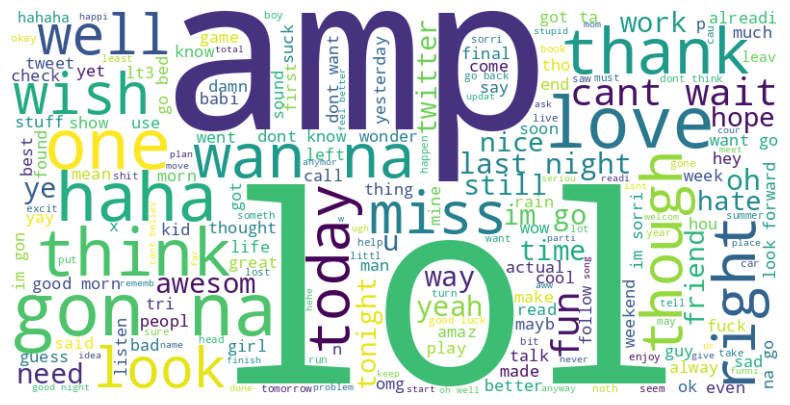

In [18]:
#Word Cloud
text_data_stemmed = ' '.join(df['StemmedTokens'].explode().astype(str))
wordcloud_stemmed = WordCloud(width=800, height=400, background_color='white').generate(text_data_stemmed)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stemmed, interpolation='bilinear')
plt.axis('off')
plt.show()

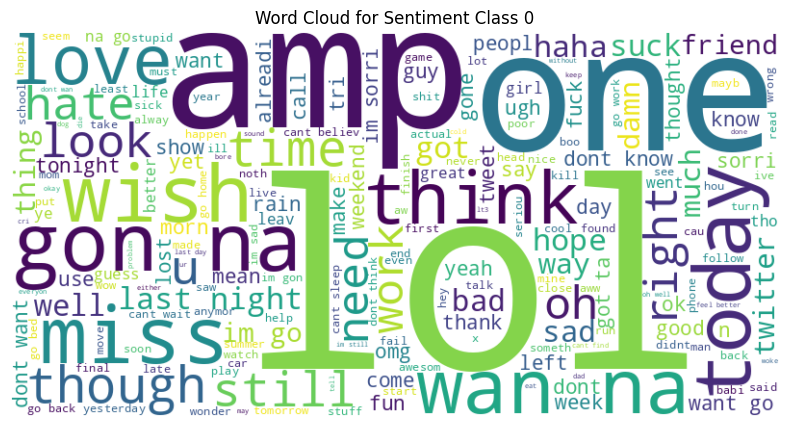

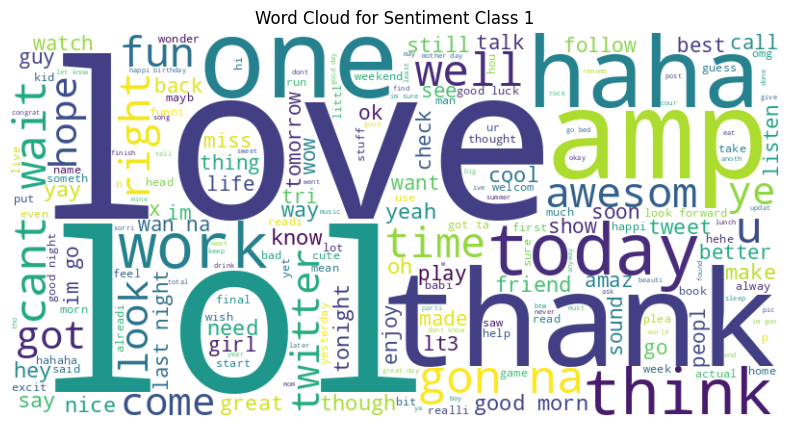

In [19]:
# Create a WordCloud object for sentiment class 0
text_data_class_0 = ' '.join(df[df['Sentiment'] == 0]['StemmedTokens'].explode().astype(str))
wordcloud_class_0 = WordCloud(width=800, height=400, background_color='white').generate(text_data_class_0)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_class_0, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sentiment Class 0')
plt.show()

# Create a WordCloud object for sentiment class 1
text_data_class_1 = ' '.join(df[df['Sentiment'] == 1]['StemmedTokens'].explode().astype(str))
wordcloud_class_1 = WordCloud(width=800, height=400, background_color='white').generate(text_data_class_1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_class_1, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sentiment Class 1')
plt.show()